MSE Loss: 0.024999999999999994
CCE Loss: 0.164252033486018
MSE Loss (Modified): 0.0425
CCE Loss (Modified): 0.22510050097477793


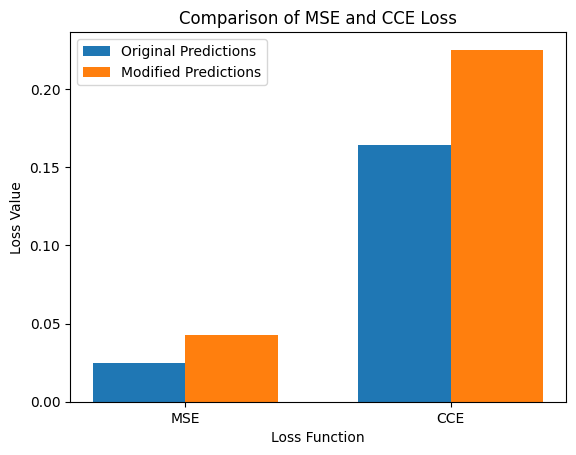

In [3]:
# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define True Values (y_true) and Model Predictions (y_pred)
# True values (ground truth) for binary classification
y_true = np.array([1, 0, 0, 1])

# Model predictions (probabilities for each class)
y_pred = np.array([0.9, 0.1, 0.2, 0.8])  # Predicted probabilities

# Step 3: Implement Mean Squared Error (MSE) Loss
def mean_squared_error(y_true, y_pred):
    """
    Compute Mean Squared Error (MSE) loss.
    MSE = average of (y_true - y_pred)^2
    """
    return np.mean((y_true - y_pred) ** 2)

# Compute MSE for original predictions
mse_loss = mean_squared_error(y_true, y_pred)
print(f"MSE Loss: {mse_loss}")

# Step 4: Implement Categorical Cross-Entropy (CCE) Loss
def categorical_cross_entropy(y_true, y_pred, epsilon=1e-15):
    """
    Compute Categorical Cross-Entropy (CCE) loss.
    CCE = -average(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))
    """
    # Clip predictions to avoid log(0) issues
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Compute CCE for original predictions
cce_loss = categorical_cross_entropy(y_true, y_pred)
print(f"CCE Loss: {cce_loss}")

# Step 5: Modify Predictions and Recompute Losses
# Slightly modify predictions
y_pred_modified = np.array([0.85, 0.15, 0.25, 0.75])

# Recompute MSE for modified predictions
mse_loss_modified = mean_squared_error(y_true, y_pred_modified)
print(f"MSE Loss (Modified): {mse_loss_modified}")

# Recompute CCE for modified predictions
cce_loss_modified = categorical_cross_entropy(y_true, y_pred_modified)
print(f"CCE Loss (Modified): {cce_loss_modified}")

# Step 6: Plot Loss Function Values
# Data for plotting
loss_names = ['MSE', 'CCE']  # Names of the loss functions
loss_values = [mse_loss, cce_loss]  # Loss values for original predictions
loss_values_modified = [mse_loss_modified, cce_loss_modified]  # Loss values for modified predictions

# Plotting
x = np.arange(len(loss_names))  # x-axis positions
width = 0.35  # Width of the bars

# Create a bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, loss_values, width, label='Original Predictions')  # Bars for original predictions
rects2 = ax.bar(x + width/2, loss_values_modified, width, label='Modified Predictions')  # Bars for modified predictions

# Add labels, title, and legend
ax.set_xlabel('Loss Function')
ax.set_ylabel('Loss Value')
ax.set_title('Comparison of MSE and CCE Loss')
ax.set_xticks(x)
ax.set_xticklabels(loss_names)
ax.legend()

# Display the plot
plt.show()

**Observations**

CCE Loss increased more significantly (from 0.164 to 0.225) compared to MSE Loss (from 0.025 to 0.0425), demonstrating its higher sensitivity to prediction changes, especially for classification tasks.